In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import math

In [ ]:
from string import punctuation

def remove_unn(s):
  str1 = ''
  for c in s:
    if c not in punctuation:
      if not c.isdigit():
        str1 = str1 + c

  return str1

In [ ]:
inp = ['/content/file_1.txt','/content/file_2.txt',
'/content/file_3.txt', '/content/file_4.txt', '/content/file_5.txt']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
docs = len(inp) # no of documents
store = []  # list of content of all docs.

for i in range(len(inp)):
  file = open(inp[i], 'r')
  string = ''
  while 1:
    # read by character
    char = file.read(1)
    if not char == '\n':
      string += char
    if not char:
      break
  
  store.append(string)
  file.close

stopwords = nltk.corpus.stopwords.words('english')

all_docs = []
for string in store:
  string = remove_unn(string.lower())
  string = string.split(' ')
  all_docs.append(string)


bow = []  # bag of words
for j in range(docs):
  temp = []
  for i in all_docs[j]:  # all_docs[j] is jth doc's list of words
    if i not in stopwords and len(i) > 0 and i != None:
      temp.append(i)
    
  bow.append(temp)

print(bow)

[['linear', 'algebra', 'singular', 'value', 'decomposition', 'svd', 'matrix', 'factorization', 'matrix', 'three', 'matrices', 'interesting', 'algebraic', 'properties', 'conveys', 'important', 'geometrical', 'theoretical', 'insights', 'linear', 'transformations', 'realize', 'common', 'questions', 'nonbeginners', 'may', 'ask', 'let', 'address', 'elephant', 'room', 'first'], ['also', 'important', 'applications', 'data', 'science', 'article', 'try', 'explain', 'mathematical', 'intuition', 'behind', 'svd', 'geometrical', 'meaning', 'instead', 'manual', 'calculations', 'use', 'python', 'libraries', 'calculations', 'later', 'give', 'examples', 'using', 'svd', 'data', 'science', 'applications', 'pca', 'dimension', 'reduction', 'pca', 'reduces', 'dimension', 'far'], ['article', 'boldface', 'lowercase', 'letters', 'like', 'refer', 'vectors', 'boldface', 'capital', 'letters', 'like', 'refer', 'matrices', 'italic', 'lowercase', 'letters', 'like', 'refer', 'scalars', 'answer', 'questions', 'interes

In [ ]:
# gives all unique terms

def uniqueness(bow):
  a = bow[0]
  for i in range(1, len(bow)):
    a = set(a).union(set(bow[i]))

  return a

w_set = uniqueness(bow)

In [ ]:
worddict = [dict.fromkeys(w_set, 0) for i in range(len(bow))]

# creates a term document matrix
def term_doc_matrix():
  for bi, wi in zip(bow, worddict):
    for row in bi:
      wi[row] += 1  # increments value of each term by 1 if that term is found
  return pd.DataFrame(worddict)

In [ ]:
doc_term = term_doc_matrix()
print(doc_term)

   first  questions  svd  widely  simplicity  ...  us  use  may  common  algebra
0      1          1    1       0           0  ...   0    0    1       1        1
1      0          0    2       0           0  ...   0    1    0       0        0
2      0          1    0       0           0  ...   0    0    0       0        0
3      0          0    4       1           0  ...   0    1    0       0        0
4      0          0    4       0           1  ...   1    0    0       0        0

[5 rows x 133 columns]


In [ ]:
def term_freq(worddict, bow):
  tfd = {}
  b_count = len(bow)
  for word, count in worddict.items():
    tfd[word] = count / float(b_count)
  return tfd

In [ ]:

tfbow = []
for i,j in zip(worddict,bow): #worddict is a list of dictionaries
    tfbow.append(term_freq(i,j))

print(tfbow)

#tfbow is a list of dictionaries. ith dictionary in tfbow is the tfdict of ith document 

[{'first': 0.03125, 'questions': 0.03125, 'svd': 0.03125, 'widely': 0.0, 'simplicity': 0.0, 'highdimensional': 0.0, 'free': 0.0, 'raw': 0.0, 'transforms': 0.0, 'libraries': 0.0, 'science': 0.0, 'explain': 0.0, 'example': 0.0, 'linear': 0.0625, 'singular': 0.03125, 'like': 0.0, 'address': 0.03125, 'matrices': 0.03125, 'far': 0.0, 'later': 0.0, 'methods': 0.0, 'perhaps': 0.0, 'scalars': 0.0, 'refer': 0.0, 'data': 0.0, 'applications': 0.0, 'involves': 0.0, 'untangle': 0.0, 'extract': 0.0, 'linearly': 0.0, 'find': 0.0, 'transformations': 0.03125, 'examples': 0.0, 'makes': 0.0, 'geometrical': 0.03125, 'calculations': 0.0, 'important': 0.03125, 'level': 0.0, 'matrix': 0.0625, 'python': 0.0, 'factorization': 0.03125, 'interest': 0.0, 'theoretical': 0.03125, 'singularvalue': 0.0, 'order': 0.0, 'skip': 0.0, 'answer': 0.0, 'also': 0.0, 'contains': 0.0, 'make': 0.0, 'manual': 0.0, 'capital': 0.0, 'italic': 0.0, 'used': 0.0, 'elements': 0.0, 'insights': 0.03125, 'simpler': 0.0, 'even': 0.0, 'trunc

In [ ]:
def idf(dlist):
  idfdict={}
  n = len(dlist)
  idfdict = dict.fromkeys(dlist[0].keys(),0)
  #initializes idfdict as a dictionary which has same keys as dlist[0] and value of each key is 0
  for doc in dlist:
      for word,val in doc.items():
          if val>0:
              idfdict[word]+=1
  #now idfdict has total occurences of each word in all of the documents
  #note that multiple occurences of a word in one document is considered as 1
  #hence if value of a key is... for eg: {'king':2,....} 
  #this means that the word king has appeared in 2 documents
  for word,val in idfdict.items():
      idfdict[word]=math.log(n/float(val)) 
      #computes log (total num of documents/no. of documents that contain a particular word)n
  return idfdict

In [ ]:
idfs = idf(worddict)
print(idfs)

{'first': 1.6094379124341003, 'questions': 0.9162907318741551, 'svd': 0.22314355131420976, 'widely': 1.6094379124341003, 'simplicity': 1.6094379124341003, 'highdimensional': 1.6094379124341003, 'free': 1.6094379124341003, 'raw': 1.6094379124341003, 'transforms': 1.6094379124341003, 'libraries': 1.6094379124341003, 'science': 1.6094379124341003, 'explain': 1.6094379124341003, 'example': 1.6094379124341003, 'linear': 1.6094379124341003, 'singular': 1.6094379124341003, 'like': 0.9162907318741551, 'address': 1.6094379124341003, 'matrices': 0.22314355131420976, 'far': 1.6094379124341003, 'later': 1.6094379124341003, 'methods': 1.6094379124341003, 'perhaps': 1.6094379124341003, 'scalars': 1.6094379124341003, 'refer': 1.6094379124341003, 'data': 0.5108256237659907, 'applications': 1.6094379124341003, 'involves': 1.6094379124341003, 'untangle': 1.6094379124341003, 'extract': 1.6094379124341003, 'linearly': 1.6094379124341003, 'find': 1.6094379124341003, 'transformations': 1.6094379124341003, '

In [ ]:
def tf_idf(tfbow_dic, idfs):
  tfidf = {}
  for w, v in tfbow_dic.items():
    tfidf[w] = v * idfs[w]  # term freq * idfs
  return tfidf

In [ ]:
tfidfl = [] 
for i in tfbow:
    tfidfl.append(tf_idf(i,idfs))
#Above loop iterates through list of dictionaries tfbow. 
#Appends output of tfidf function(a dictionary) to tfidfl
print(tfidfl)

[{'first': 0.050294934763565634, 'questions': 0.028634085371067347, 'svd': 0.006973235978569055, 'widely': 0.0, 'simplicity': 0.0, 'highdimensional': 0.0, 'free': 0.0, 'raw': 0.0, 'transforms': 0.0, 'libraries': 0.0, 'science': 0.0, 'explain': 0.0, 'example': 0.0, 'linear': 0.10058986952713127, 'singular': 0.050294934763565634, 'like': 0.0, 'address': 0.050294934763565634, 'matrices': 0.006973235978569055, 'far': 0.0, 'later': 0.0, 'methods': 0.0, 'perhaps': 0.0, 'scalars': 0.0, 'refer': 0.0, 'data': 0.0, 'applications': 0.0, 'involves': 0.0, 'untangle': 0.0, 'extract': 0.0, 'linearly': 0.0, 'find': 0.0, 'transformations': 0.050294934763565634, 'examples': 0.0, 'makes': 0.0, 'geometrical': 0.028634085371067347, 'calculations': 0.0, 'important': 0.01596330074268721, 'level': 0.0, 'matrix': 0.03192660148537442, 'python': 0.0, 'factorization': 0.028634085371067347, 'interest': 0.0, 'theoretical': 0.050294934763565634, 'singularvalue': 0.0, 'order': 0.0, 'skip': 0.0, 'answer': 0.0, 'also':

In [ ]:
def transpose(A):
    ans = np.zeros((len(A[0]),len(A)))
    for i in range(len(A)):
        for j in range(len(A[0])):
            ans[j][i] = A[i][j]
    return ans

In [ ]:
def matmul(A,X):
    if(type(X)!=list and len(X.shape)==1):
        X = X.reshape((len(X), 1))
    ans = np.zeros((len(A),len(X[0])))
    for i in range(len(A)):
        for j in range(len(X[0])):
            for k in range(len(X)):
                ans[i][j] = ans[i][j] + A[i][k]*X[k][j]
    if(type(X)!=list and ans.shape[1]==1):
        ans = ans.reshape((len(ans)))
    return ans

In [ ]:
def SVD(A):
    original = A.copy()
    
    u, s, v = np.linalg.svd(original)
    
    return u, s, v

In [ ]:
X = pd.DataFrame(tfidfl).T
l_2d = X.T.values.tolist()
l_2d = np.array(l_2d)
l_2d = transpose(l_2d)
L,S,R=SVD(l_2d)

In [ ]:
print(L.shape, S.shape, R.shape)

(133, 133) (5,) (5, 5)


In [ ]:
def zero_padding(n, u, s, v):
  t = []
  for i in range(n):
    t.append(s[i])  # t = tuple containing first n chars of s
    for i in range(len(s) - n):
      t.append(0)   # remaining values of t are 0
  
  #convert the non-selected singular values to 0 and form a diagonal matrix, store as A
  A = []
  for i in range (0,len(S)):
    temp = []
    for j in range(0,len(S)):
        if(j == i):
            temp.append(float(t[j]))
        else:
            temp.append(float(0))
    A.append(temp)
  newrow = []
  for i in range(0,len(S)):
      newrow.append(0)
  # newrow is a list of zeros having same length as S
  for i in range(len(u)-len(S)): 
      A.append(newrow)
  return A

In [ ]:
def reconstruct(u,s,v,n):
  # returns the product of multiply(u, A, v)
  A=zero_padding(n,u,s,v)
  return np.round(matmul(matmul(u,A),v),decimals=3)
    
def frobenius(a,a2): 
  #finds how similar two matrices are
  # computes the frobenius norm of a matrix
  
  temp_1=(a-a2)**2
  temp_2=a**2
  sum1,sum2=0,0
  
  for i in (temp_1):
      for j in (i):
          sum1+=j
  for i in (temp_2):
      for j in (i):
          sum2+=j
  ret = math.sqrt(sum1)/math.sqrt(sum2)
  return ret 

In [ ]:
def search(q):
  q=remove_unn(q)
  q=q.lower().split(" ")
  terms = X.index
  
  query=[]
  for i in terms:
    if(i in q):
      query.append(1)
    else:
      query.append(0) 
  query=np.asarray(query)
  if 1 not in query:
    print("Could not find any documents")
  
  else:
    k = 3 # as told we are u wsing a consstant value of k not that find_k()
    print("q",query)
    reconstructed_A = reconstruct(L,S,R,k) 
    print(reconstructed_A)

    score = query.dot(reconstructed_A)
    
    sort = {}
    for i in range(len(score)):
      if(score[i]<0):
        score[i]=0
      sort[i+1] = score[i]
    last = {}
    for w in sorted(sort, key=sort.get, reverse=True):
      last[w]=sort[w]
    xAxis=[]
    title="Document-wise weightage of the string: "
    for i in q: 
      title=title+" "+i
    yAxis=[]
    
    for document,sc in last.items():
      print("Document: ",document)
      xAxis.append(document)
      yAxis.append(sc)
    
    plt.bar(xAxis, yAxis, color ='red',  
            width = 0.4) 
    
    plt.xlabel("Document number") 
    plt.ylabel("Relevance-Score") 
    plt.title(title) 
    plt.show() 

Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit
Enter keyword you want to search

Loading your search results...
q [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[ 0.003  0.002  0.01  -0.006 -0.006]
 [ 0.006  0.004  0.025 -0.003 -0.003]
 [-0.004 -0.003  0.004  0.021  0.022]
 [-0.004 -0.004  0.001  0.022  0.023]
 [-0.004 -0.003  0.001  0.02   0.021]
 [-0.004 -0.003  0.001  0.02   0.021]
 [ 0.008  0.004  0.034  0.001  0.001]
 [-0.004 -0.003  0.001  0.02   0.021]
 [ 0.008  0.004  0.034  0.001  0.001]
 [ 0.002  0.001  0.005 -0.004 -0.004]
 [ 0.004  0.003  0.01  -0.008 -0.009]
 [ 0.002  0.001  0.005 -0.004 -0.004]
 [ 0.008  0.004  0.034  0.001  0.001]
 [ 0.007  0.005  0.021 -0.011 -0.012]
 [ 0.003  0.002  0.01  -0.006 -0.006]
 [ 0.011  0.005  0.0

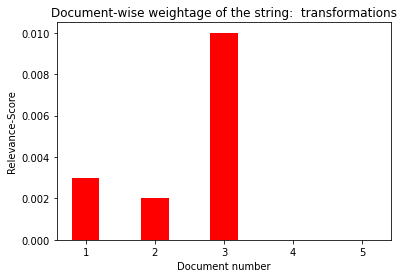



Please choose an option:
1: Search keywords 
2: View Documents 
3: Exit


In [ ]:
while(1):
    print("Please choose an option:\n"
    + "1: Search keywords \n"
    + "2: View Documents \n"
    + "3: Exit")
    opt = int(input())
    if(opt == 1):
        print("Enter keyword you want to search\n")
        s = input()
        print("Loading your search results...")
        search(s)
        print("\n")
    elif (opt == 2):
        print("Enter Document number:\n\n")
        doc_n = int(input())

        if(doc_n>len(store)):
            print("There are only ",len(store)," documents")
            continue
        print(store[doc_n - 1])
        print("\n")
    elif( opt == 3):
        print("THANK YOU")
        exit()
        break
    else:
        print("Enter valid input. ")

In [ ]:
+